# Michael Trumbull - Final Project

## Predicting superconducting transition temperatures from material database

This code is an attempt to predict the critical temperature of superconductors. Kam Hamidieh wrote a paper on "A Dat-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor". Dr. Hamidieh wrote his prediction code in R. Here we will predict using python.
( The data came in as Rdata from https://github.com/khamidieh/predict_tc )

## Part 1 - Extract the dataset

1. Download tc.RData <br>
use R for the following commands:
2. load("tc.RData")
3. write.csv(train, "train.csv", row.names = F)
4. write.csv(unique_m, "unique_m.csv", row.names = F)

## Part 2 - Visualization and exploration of the data

#### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a = pd.read_csv('train.csv', sep=',')
adata = a.values
print('A-data is from train.csv. It contains data such as conductivity and valence electrons')

print('A-data: ', np.shape(adata))
alabel = list(a)
print('A-labels: ', np.shape(alabel))

print()

b = pd.read_csv('unique_m.csv', sep=',')
bdata = b.values
print('B-data is from unique_m.csv. It contains how much of each element is present & crit temp & compound')
print('B-data: ', np.shape(bdata))
blabel = list(b)
print('B-labels: ', np.shape(blabel))



A-data is from train.csv. It contains data such as conductivity and valence electrons
A-data:  (21263, 82)
A-labels:  (82,)

B-data is from unique_m.csv. It contains how much of each element is present & crit temp & compound
B-data:  (21263, 88)
B-labels:  (88,)


#### All the labels

In [2]:
print('A-labels')
for i in range(0,82):
    print(i,alabel[i])
print('\nB-labels')
for i in range(0,88):
    print(i,blabel[i])

A-labels
0 number_of_elements
1 mean_atomic_mass
2 wtd_mean_atomic_mass
3 gmean_atomic_mass
4 wtd_gmean_atomic_mass
5 entropy_atomic_mass
6 wtd_entropy_atomic_mass
7 range_atomic_mass
8 wtd_range_atomic_mass
9 std_atomic_mass
10 wtd_std_atomic_mass
11 mean_fie
12 wtd_mean_fie
13 gmean_fie
14 wtd_gmean_fie
15 entropy_fie
16 wtd_entropy_fie
17 range_fie
18 wtd_range_fie
19 std_fie
20 wtd_std_fie
21 mean_atomic_radius
22 wtd_mean_atomic_radius
23 gmean_atomic_radius
24 wtd_gmean_atomic_radius
25 entropy_atomic_radius
26 wtd_entropy_atomic_radius
27 range_atomic_radius
28 wtd_range_atomic_radius
29 std_atomic_radius
30 wtd_std_atomic_radius
31 mean_Density
32 wtd_mean_Density
33 gmean_Density
34 wtd_gmean_Density
35 entropy_Density
36 wtd_entropy_Density
37 range_Density
38 wtd_range_Density
39 std_Density
40 wtd_std_Density
41 mean_ElectronAffinity
42 wtd_mean_ElectronAffinity
43 gmean_ElectronAffinity
44 wtd_gmean_ElectronAffinity
45 entropy_ElectronAffinity
46 wtd_entropy_ElectronAffini

#### Questions

How many variables?
A-data (train.csv):  (82,)  B-data (unique_m.csv):  (88,) added together is 170

How many entries?
Entries in the training set wont include critical_temp(appears twice) or material name(appears once).
So the total number of entries is 167

Which elements appear most often?


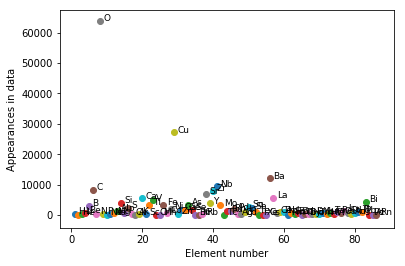

In [3]:
print('How many variables?')
print('A-data (train.csv): ',np.shape(alabel),' B-data (unique_m.csv): ',np.shape(blabel),'added together is 170')
print()
print('How many entries?')
print('Entries in the training set wont include critical_temp(appears twice) or material name(appears once).')
print('So the total number of entries is 167')
print()
print('Which elements appear most often?')

for i in range(0,86):
    plt.scatter(i+1,sum(bdata[:,i]))
    plt.text(i+2, sum(bdata[:,i])+1, blabel[i], fontsize=9)
    plt.xlabel('Element number')
    plt.ylabel('Appearances in data')
plt.show()


#### Visualize - Entire dataset

#### All data

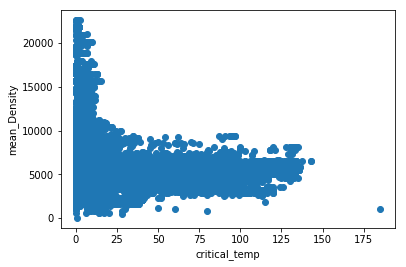

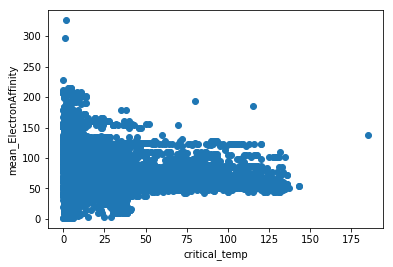

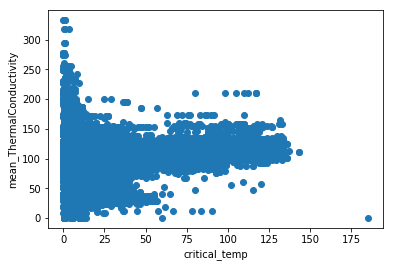

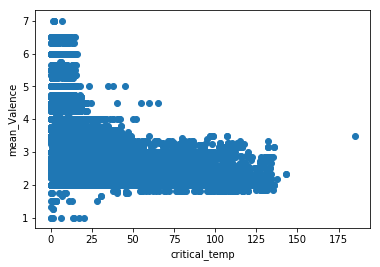

Highest critical temp:  H2S1  at  185.0 K


In [4]:
def grapha(x,y):
    plt.scatter(adata[:,x],adata[:,y])
    plt.xlabel(alabel[x])
    plt.ylabel(alabel[y])
    plt.show()
grapha(81,31)
grapha(81,41)
grapha(81,61)
grapha(81,71)
print('Highest critical temp: ', bdata[np.argmax(bdata[:,86]),87], ' at ', max(bdata[:,86]), 'K')


#### Visualize - Tc < 10K

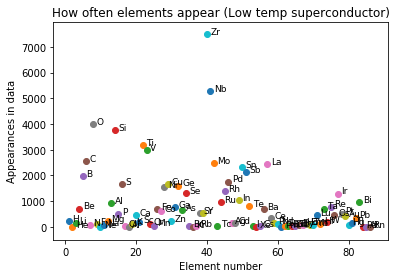

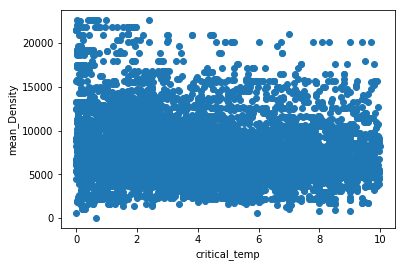

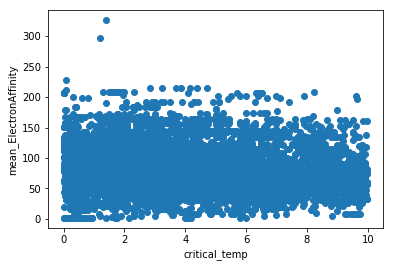

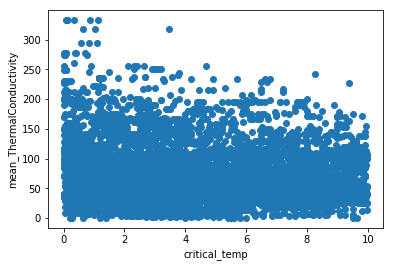

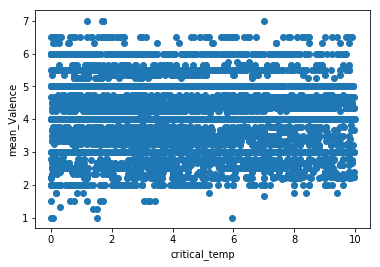

Highest critical temp:  Lu1Ru1B2  at  9.99 K


In [5]:
#Initialize 2d array to hold low temp data
adata_lt = []
bdata_lt = []
h = 0

#Find the first super conductor to fit low temp criteria
for i in range(0,21263):
    if bdata[i,86]<10:
        adata_lt = adata[i,:]
        bdata_lt = bdata[i,:]
        h = i
        break

#Add to the array every time we find a low temp superconductor
for i in range(h,21263):
    if bdata[i,86]<10:
        adata_lt = np.vstack([adata_lt,adata[i,:]])
        bdata_lt = np.vstack([bdata_lt,bdata[i,:]])

#Plot interesting behavoir
for i in range(0,86):
    plt.scatter(i+1,sum(bdata_lt[:,i]))
    plt.text(i+2, sum(bdata_lt[:,i])+1, blabel[i], fontsize=9)
    plt.xlabel('Element number')
    plt.ylabel('Appearances in data')
plt.title('How often elements appear (Low temp superconductor)')
plt.show()
def grapha(x,y):
    plt.scatter(adata_lt[:,x],adata_lt[:,y])
    plt.xlabel(alabel[x])
    plt.ylabel(alabel[y])
    plt.show()
grapha(81,31)
grapha(81,41)
grapha(81,61)
grapha(81,71)
print('Highest critical temp: ', bdata_lt[np.argmax(bdata_lt[:,86]),87], ' at ', max(bdata_lt[:,86]), 'K')

#### Visualize - Iron based superconductors

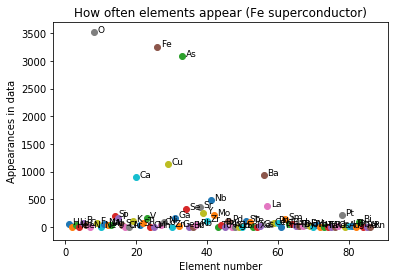

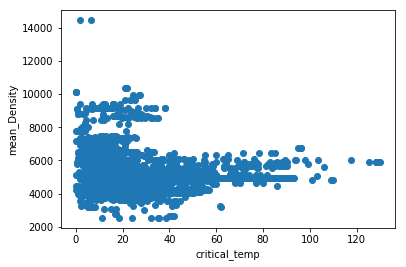

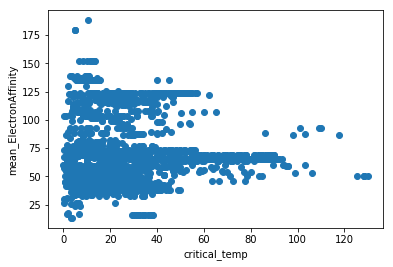

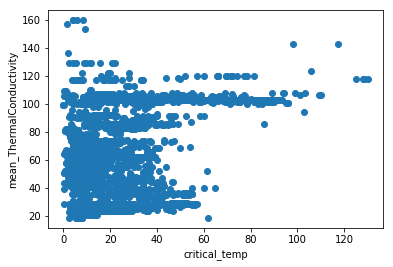

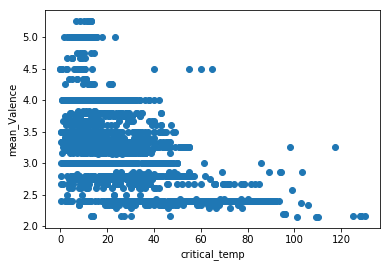

Highest critical temp:  Hg1Ba2Ca2Cu3Fe0.6O  at  130.0 K


In [6]:
#Initialize 2d array to hold data with iron
adata_fe = []
bdata_fe = []
h = 0

#Find the first super conductor to use iron
for i in range(0,21263):
    if bdata[i,25]>0:
        adata_fe = adata[i,:]
        bdata_fe = bdata[i,:]
        h = i
        break

#Add to the array every time we find iron
for i in range(h,21263):
    if bdata[i,25]>0:
        adata_fe = np.vstack([adata_fe,adata[i,:]])
        bdata_fe = np.vstack([bdata_fe,bdata[i,:]])
#Plot interesting behavoir
for i in range(0,86):
    plt.scatter(i+1,sum(bdata_fe[:,i]))
    plt.text(i+2, sum(bdata_fe[:,i])+1, blabel[i], fontsize=9)
    plt.xlabel('Element number')
    plt.ylabel('Appearances in data')
plt.title('How often elements appear (Fe superconductor)')
plt.show()
def grapha(x,y):
    plt.scatter(adata_fe[:,x],adata_fe[:,y])
    plt.xlabel(alabel[x])
    plt.ylabel(alabel[y])
    plt.show()
grapha(81,31)
grapha(81,41)
grapha(81,61)
grapha(81,71)
print('Highest critical temp: ', bdata_fe[np.argmax(bdata_fe[:,86]),87], ' at ', max(bdata_fe[:,86]), 'K')

#### Visualize - High temp superconductors

Hight Temp Superconductor (HTC) is characterized by a ration of 1 Copper : 2 Oxygen


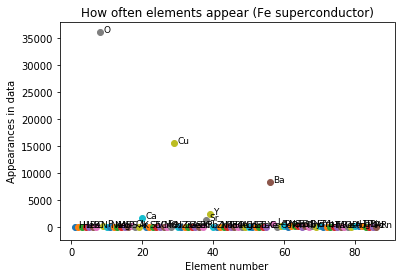

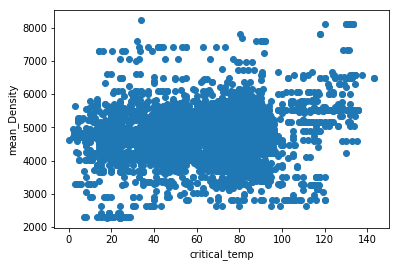

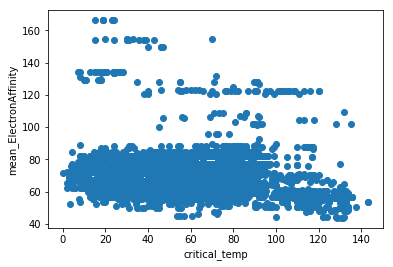

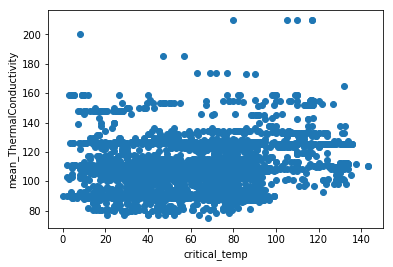

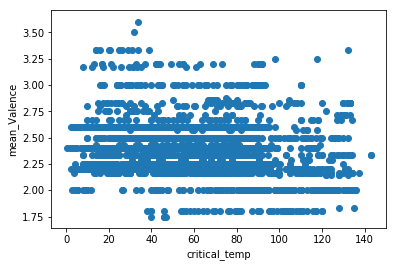

Highest critical temp:  Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4  at  143.0 K


In [7]:
#Initialize 2d array to hold low temp data
adata_htc = []
bdata_htc = []
h = 0

#Find the first super conductor to fit low temp criteria
for i in range(0,21263):
    if (bdata[i,7]>0 and bdata[i,28]>0):
        ratio = bdata[i,28]/bdata[i,7]
        if (ratio < .7) and (ratio > .3):
            adata_htc = adata[i,:]
            bdata_htc = bdata[i,:]
            h = i
            break

#Add to the array every time we find a low temp superconductor
for i in range(h,21263):
    if (bdata[i,7]>0 and bdata[i,28]>0):
        ratio = bdata[i,28]/bdata[i,7]
        if (ratio < .7) and (ratio > .3):
            adata_htc = np.vstack([adata_htc,adata[i,:]])
            bdata_htc = np.vstack([bdata_htc,bdata[i,:]])
#Plot interesting behavoir
print('Hight Temp Superconductor (HTC) is characterized by a ration of 1 Copper : 2 Oxygen')
for i in range(0,86):
    plt.scatter(i+1,sum(bdata_htc[:,i]))
    plt.text(i+2, sum(bdata_htc[:,i])+1, blabel[i], fontsize=9)
    plt.xlabel('Element number')
    plt.ylabel('Appearances in data')
plt.title('How often elements appear (Fe superconductor)')
plt.show()
def grapha(x,y):
    plt.scatter(adata_htc[:,x],adata_htc[:,y])
    plt.xlabel(alabel[x])
    plt.ylabel(alabel[y])
    plt.show()
grapha(81,31)
grapha(81,41)
grapha(81,61)
grapha(81,71)
print('Highest critical temp: ', bdata_htc[np.argmax(bdata_htc[:,86]),87], ' at ', max(bdata_htc[:,86]), 'K')

## Dimensionality reduction

#### Bring both arrays of data into 1 data array for easier PCA use (also a new labels array and an array soley for the target)

In [8]:
#Use principle component analysis (PCA) to help visualize the entire dataset

#Put all the data into a single 2D array (tdata = total data)
tdata = np.hstack([bdata[:,0:86],adata[:,0:81]])
ttarget = adata[:,81]#This is our Crit temp and will be the target
tlabel = []
for i in range(0,86):
    tlabel.append(blabel[i])
for i in range(0,81):
    tlabel.append(alabel[i])

for i in range(0,167):
    print(i,tlabel[i])
print(np.shape(tlabel))
print(np.shape(tdata))

0 H
1 He
2 Li
3 Be
4 B
5 C
6 N
7 O
8 F
9 Ne
10 Na
11 Mg
12 Al
13 Si
14 P
15 S
16 Cl
17 Ar
18 K
19 Ca
20 Sc
21 Ti
22 V
23 Cr
24 Mn
25 Fe
26 Co
27 Ni
28 Cu
29 Zn
30 Ga
31 Ge
32 As
33 Se
34 Br
35 Kr
36 Rb
37 Sr
38 Y
39 Zr
40 Nb
41 Mo
42 Tc
43 Ru
44 Rh
45 Pd
46 Ag
47 Cd
48 In
49 Sn
50 Sb
51 Te
52 I
53 Xe
54 Cs
55 Ba
56 La
57 Ce
58 Pr
59 Nd
60 Pm
61 Sm
62 Eu
63 Gd
64 Tb
65 Dy
66 Ho
67 Er
68 Tm
69 Yb
70 Lu
71 Hf
72 Ta
73 W
74 Re
75 Os
76 Ir
77 Pt
78 Au
79 Hg
80 Tl
81 Pb
82 Bi
83 Po
84 At
85 Rn
86 number_of_elements
87 mean_atomic_mass
88 wtd_mean_atomic_mass
89 gmean_atomic_mass
90 wtd_gmean_atomic_mass
91 entropy_atomic_mass
92 wtd_entropy_atomic_mass
93 range_atomic_mass
94 wtd_range_atomic_mass
95 std_atomic_mass
96 wtd_std_atomic_mass
97 mean_fie
98 wtd_mean_fie
99 gmean_fie
100 wtd_gmean_fie
101 entropy_fie
102 wtd_entropy_fie
103 range_fie
104 wtd_range_fie
105 std_fie
106 wtd_std_fie
107 mean_atomic_radius
108 wtd_mean_atomic_radius
109 gmean_atomic_radius
110 wtd_gmean_atomic_radius


#### Use PCA

...PCA visualization...
Data shape:  (21263, 167)
Projected shape:  (21263, 2)


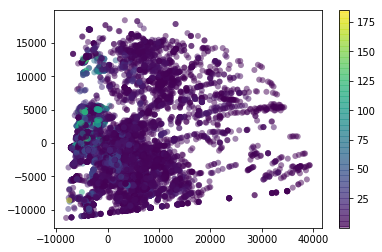

This, PCA, is not helpful. Projecting 167 dimensions 
 onto 2 loses all sense of meaning visually



In [9]:
from sklearn.decomposition import PCA

print('...PCA visualization...')
pca = PCA(2)
proj = pca.fit_transform(tdata)
print('Data shape: ', np.shape(tdata))
print('Projected shape: ', np.shape(proj))

plt.scatter(proj[:, 0], proj[:, 1], c=ttarget, edgecolor='none', alpha=0.5)
plt.colorbar()
plt.show()
print('This, PCA, is not helpful. Projecting 167 dimensions \n onto 2 loses all sense of meaning visually')
print()



# Random Forest

#### Set up

In [10]:
from sklearn import tree
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
data = adata[:,0:81]
target = adata[:,81]
xtrain, xtest, ytrain, ytest = train_test_split(data,target,random_state=0)



/home/trumbumi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  


#### Random forest

created encoded
created object
train
predicting
Mean Squared Error:  2410319.95787892
Variance score:  -2061.6150170111755

The Random Forest Classifier gave an error: cant find function continuous. 
This meant I had to encode ytrain for the fit function to work.
I beleive that encoding function was what caused the fit to fail so spectacularly.


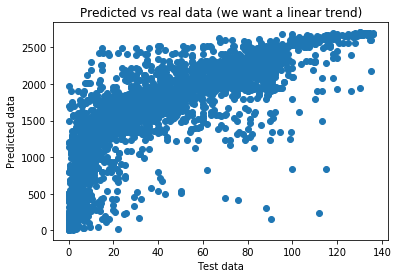

In [11]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ytrain)
print('created encoded')

model = RandomForestClassifier(random_state=0)
print('created object')
model = model.fit(xtrain,encoded)
print('train')
predict = model.predict(xtest)
print('predicting')
print('Mean Squared Error: ', mean_squared_error(ytest,predict))
print('Variance score: ', r2_score(ytest,predict))
print()

plt.scatter(ytest,predict)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Predicted vs real data (we want a linear trend)')
plt.plot()
print('The Random Forest Classifier gave an error: cant find function continuous. ')
print('This meant I had to encode ytrain for the fit function to work.' )
print('I beleive that encoding function was what caused the fit to fail so spectacularly.')

#### Low temp tree

created encoded
created object
train
predicting
Mean Squared Error:  474856.5388424693
Variance score:  -66172.1787511454



[]

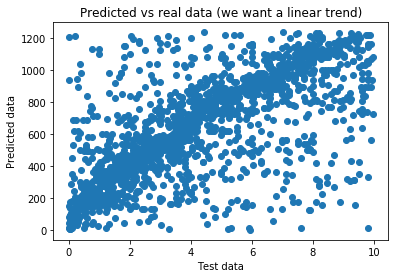

In [12]:
#Low Temp
data = adata_lt[:,0:81]
target = adata_lt[:,81]
xtrain, xtest, ytrain, ytest = train_test_split(data,target,random_state=0)
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ytrain)
print('created encoded')

model = RandomForestClassifier(random_state=0)
print('created object')
model = model.fit(xtrain,encoded)
print('train')
predict = model.predict(xtest)
print('predicting')
print('Mean Squared Error: ', mean_squared_error(ytest,predict))
print('Variance score: ', r2_score(ytest,predict))
print()

plt.scatter(ytest,predict)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Predicted vs real data (we want a linear trend)')
plt.plot()

#### Fe tree

created encoded
created object
train
predicting
Mean Squared Error:  133958.58245955556
Variance score:  -309.47602779066796



[]

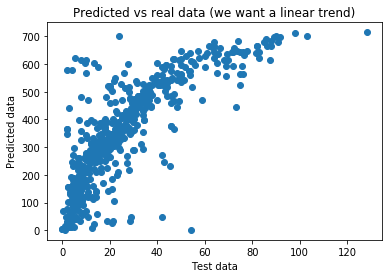

In [13]:
#Low Temp
data = adata_fe[:,0:81]
target = adata_fe[:,81]
xtrain, xtest, ytrain, ytest = train_test_split(data,target,random_state=0)
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ytrain)
print('created encoded')

model = RandomForestClassifier(random_state=0)
print('created object')
model = model.fit(xtrain,encoded)
print('train')
predict = model.predict(xtest)
print('predicting')
print('Mean Squared Error: ', mean_squared_error(ytest,predict))
print('Variance score: ', r2_score(ytest,predict))
print()

plt.scatter(ytest,predict)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Predicted vs real data (we want a linear trend)')
plt.plot()

#### HTC tree

created encoded
created object
train
predicting
Mean Squared Error:  133958.58245955556
Variance score:  -309.47602779066796



[]

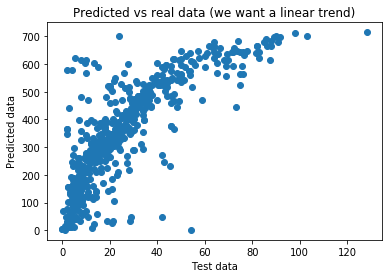

In [14]:
#Low Temp
data = adata_fe[:,0:81]
target = adata_fe[:,81]
xtrain, xtest, ytrain, ytest = train_test_split(data,target,random_state=0)
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ytrain)
print('created encoded')

model = RandomForestClassifier(random_state=0)
print('created object')
model = model.fit(xtrain,encoded)
print('train')
predict = model.predict(xtest)
print('predicting')
print('Mean Squared Error: ', mean_squared_error(ytest,predict))
print('Variance score: ', r2_score(ytest,predict))
print()

plt.scatter(ytest,predict)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Predicted vs real data (we want a linear trend)')
plt.plot()

## Part 5 - Other Machine learning model

#### Decision tree classifier

Mean Squared Error:  2362404.113552682
Variance score:  -2020.6113570045432



[]

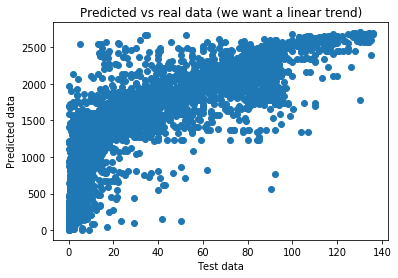

In [15]:
data = adata[:,0:81]
target = adata[:,81]
xtrain, xtest, ytrain, ytest = train_test_split(data,target,random_state=0)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ytrain)

model = tree.DecisionTreeClassifier(random_state=0)
model = model.fit(xtrain,encoded)
predict = model.predict(xtest)
print('Mean Squared Error: ', mean_squared_error(ytest,predict))
print('Variance score: ', r2_score(ytest,predict))
print()

plt.scatter(ytest,predict)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Predicted vs real data (we want a linear trend)')
plt.plot()

#### Linear regression

Linear Regression - Mean squared error:  308.65200880021035
Linear Regression - Variance score:  0.7358731290835705


[]

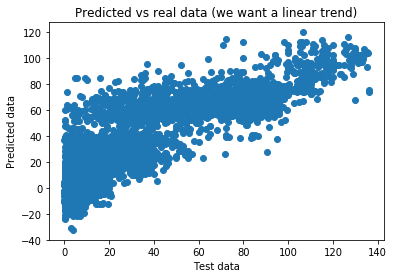

In [16]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler

#Initialize object
model1 = linear_model.LinearRegression()
model1.fit(xtrain,ytrain)
predict1 = model1.predict(xtest)


#Mean squared between test data and predicted data
mean1 = mean_squared_error(ytest, predict1)
print("Linear Regression - Mean squared error: ", mean1)
#Variance between test data and predicted data
rsq1 = r2_score(ytest, predict1)
print("Linear Regression - Variance score: ", rsq1)

plt.scatter(ytest,predict1)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Predicted vs real data (we want a linear trend)')
plt.plot()

In [25]:
print('It turns out that both tree methods of machine learning were worse than a simple linear regression. ')


It turns out that both tree methods of machine learning were worse than a simple linear regression. 
